# 使用完全連接層估算簡單線性迴歸的參數w、b

In [1]:
# 載入套件
import numpy as np 
import torch

## 產生隨機資料

In [2]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 定義模型

In [3]:
# 定義模型
def create_model(input_feature, output_feature):
    model = torch.nn.Sequential(
        torch.nn.Linear(input_feature, output_feature),
        torch.nn.Flatten(0, -1) # 所有維度轉成一維 
    )
    return model

## 定義訓練函數

In [4]:
def train(X, y, epochs=100, lr=1e-4):
    model = create_model(1, 1)

    # 定義損失函數
    loss_fn = torch.nn.MSELoss(reduction='sum') 

    # 定義優化器
    optimizer = torch.optim.Adam(model.parameters(), lr=lr) 

    loss_list, w_list, b_list=[], [], []
    for epoch in range(epochs):   # 執行訓練週期
        y_pred = model(X)        # 預測值
        
        # 計算損失函數值
        # print(y_pred.shape, y.shape)
        MSE = loss_fn(y_pred, y) 
        
        # 梯度重置：改由優化器(Optimizer)控制
        optimizer.zero_grad()
        
        # 反向傳導
        MSE.backward()  
        
        # 權重更新：改用 model.parameters 取代 w、b 逐一更新
        optimizer.step()
        
        # 記錄訓練結果
        if (epoch+1) % 1000 == 0 or epochs < 1000:
            w_list.append(model[0].weight[:, 0].item())  # w.item()：轉成常數
            b_list.append(model[0].bias.item())
            loss_list.append(MSE.item())
        
    return w_list, b_list, loss_list

## 執行訓練

In [5]:
# 使用不同學習率及更多的執行週期訓練
X2, y2 = torch.FloatTensor(X.reshape(X.shape[0], 1)), torch.FloatTensor(y)
w_list, b_list, loss_list = train(X2, y2, epochs=10**5, lr=1e-5)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9388492107391357, b=1.8608417510986328


In [6]:
# 執行訓練
coef = np.polyfit(X, y, deg=1)

# 取得 w、b 的最佳解
print(f'w={coef[0]}, b={coef[1]}')

w=0.8822460195006762, b=3.837641144323969


In [7]:
from sklearn.linear_model import LinearRegression

X2 = X.reshape(X.shape[0], 1)

lr = LinearRegression()
lr.fit(X2, y)

lr.coef_[0], lr.intercept_

(0.8822460195006766, 3.837641144323971)

## 顯示迴歸線

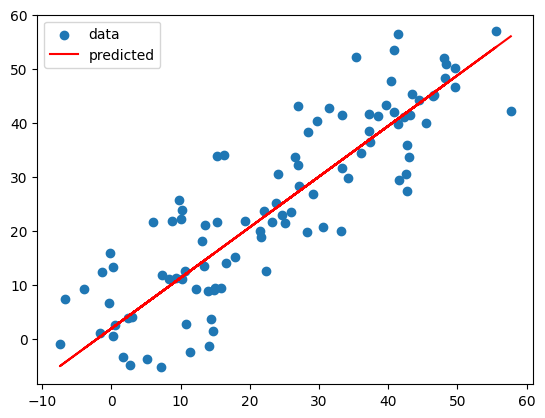

In [8]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()

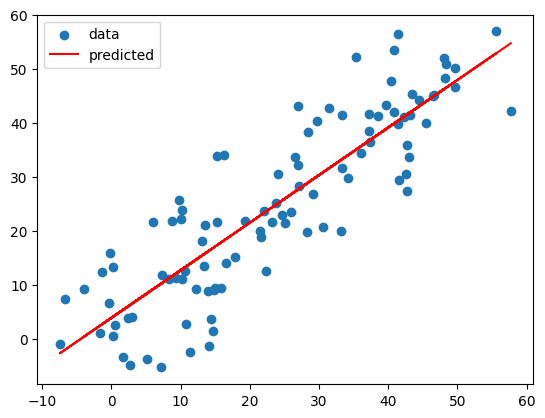

In [9]:
# NumPy 求得的迴歸線
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, coef[0] * X + coef[1], 'r-', label='predicted')
plt.legend()

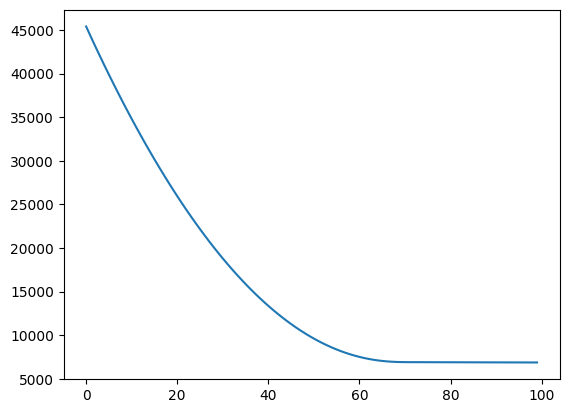

In [10]:
# 損失函數繪圖
plt.plot(loss_list)

In [11]:
loss_list

[45414.0625,
 44270.46484375,
 43147.43359375,
 42043.6796875,
 40957.20703125,
 39890.88671875,
 38841.52734375,
 37809.1328125,
 36793.69140625,
 35795.21875,
 34813.62890625,
 33848.95703125,
 32901.5390625,
 31971.560546875,
 31060.70703125,
 30166.705078125,
 29289.5625,
 28429.2734375,
 27585.83984375,
 26759.26171875,
 25949.54296875,
 25157.15625,
 24383.39453125,
 23626.39453125,
 22886.150390625,
 22162.662109375,
 21455.9296875,
 20765.953125,
 20092.734375,
 19436.26953125,
 18799.48046875,
 18180.087890625,
 17577.251953125,
 16990.97265625,
 16421.251953125,
 15868.08984375,
 15331.48828125,
 14812.04296875,
 14311.6689453125,
 13827.64453125,
 13359.97265625,
 12908.6474609375,
 12473.671875,
 12057.373046875,
 11657.36328125,
 11273.5068359375,
 10906.12109375,
 10556.6240234375,
 10223.173828125,
 9906.171875,
 9606.41796875,
 9322.4208984375,
 9055.69140625,
 8804.7587890625,
 8570.6826171875,
 8352.7421875,
 8150.9111328125,
 7965.19677734375,
 7795.564453125,
 7641.

In [12]:
w_list

[0.2853410542011261,
 0.29525527358055115,
 0.3051397502422333,
 0.3150043189525604,
 0.32486870884895325,
 0.3347034752368927,
 0.34453824162483215,
 0.3543730080127716,
 0.36420777440071106,
 0.3740425407886505,
 0.38387730717658997,
 0.3937120735645294,
 0.40354683995246887,
 0.41337621212005615,
 0.4231811761856079,
 0.43298614025115967,
 0.4427911043167114,
 0.4525960683822632,
 0.46240103244781494,
 0.4722059965133667,
 0.48201096057891846,
 0.4918096959590912,
 0.5015848875045776,
 0.5113600492477417,
 0.5211352109909058,
 0.5309103727340698,
 0.5406855344772339,
 0.550460696220398,
 0.560235857963562,
 0.5700110197067261,
 0.579739511013031,
 0.5894550681114197,
 0.5991706252098083,
 0.608886182308197,
 0.6186017394065857,
 0.6283172965049744,
 0.638032853603363,
 0.6477382779121399,
 0.6573942303657532,
 0.6670501828193665,
 0.6767061352729797,
 0.686362087726593,
 0.6960180401802063,
 0.7056174874305725,
 0.7152138352394104,
 0.7248101830482483,
 0.7343977689743042,
 0.743934